In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random
%matplotlib inline

In [25]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Resources\Mouse_metadata.csv")
study_results = pd.read_csv("Resources\Study_results.csv")

In [26]:
# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata,study_results,on='Mouse ID')

mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_data_regime_gb=mouse_data.groupby("Drug Regimen")
mouse_data_summary=mouse_data_regime_gb[["Tumor Volume (mm3)"]].mean()
mouse_data_summary=mouse_data_summary.rename(columns={"Tumor Volume (mm3)":"mean"})
mouse_data_summary["median"]=mouse_data_regime_gb[["Tumor Volume (mm3)"]].median()
mouse_data_summary["variance"]=mouse_data_regime_gb[["Tumor Volume (mm3)"]].var()
mouse_data_summary["standard deviation"]=mouse_data_regime_gb[["Tumor Volume (mm3)"]].std()
mouse_data_summary["SEM"]=mouse_data_regime_gb[["Tumor Volume (mm3)"]].sem()
mouse_data_summary

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drug_Regimen=mouse_data["Drug Regimen"].unique()
x_axis = np.arange(len(Drug_Regimen)) 
Drug_Regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

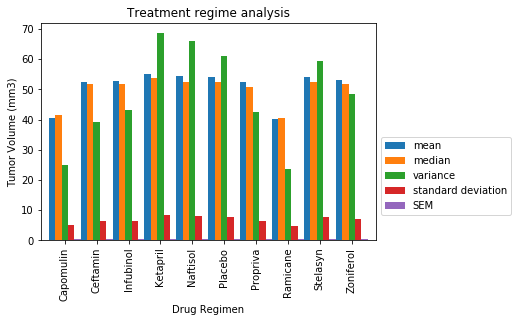

<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_data_summary_chart = mouse_data_summary.plot(kind='bar',width=1)

# Set the xlabel and ylabel using class methods
mouse_data_summary_chart.set_xlabel("Drug Regimen")
mouse_data_summary_chart.set_ylabel("Tumor Volume (mm3)")
mouse_data_summary_chart.set_title("Treatment regime analysis")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))

plt.show()
plt.tight_layout()

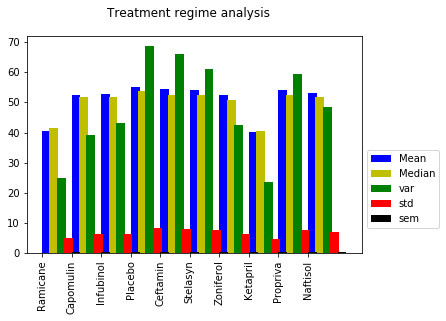

In [30]:
 # Generate a bar plot showing number of data points for each treatment regimen using pyplot
Drug_Regimen=mouse_data["Drug Regimen"].unique()
# Set x axis and tick locations
x_axis = np.arange(len(Drug_Regimen))
#volume_label=np.arange(0,100,10)
bar_width=0.3
plt.bar(x_axis+0.00,mouse_data_summary["mean"], color='b',width=bar_width,label="Mean",align='edge')
plt.bar(x_axis+0.25,mouse_data_summary["median"], color='y',width=bar_width,label="Median",align='edge')
plt.bar(x_axis+0.5,mouse_data_summary["variance"], color='g',width=bar_width,label="var",align='edge')
plt.bar(x_axis+0.75,mouse_data_summary["standard deviation"], color='r',width=bar_width,label="std",align='edge')
plt.bar(x_axis+1.00,mouse_data_summary["SEM"], color='k',width=bar_width,label="sem",align='edge')
tick_locations=[value for value in x_axis]
plt.suptitle("Treatment regime analysis")
#plt.style.use('fivethirtyeight')
plt.xticks(x_axis,Drug_Regimen,rotation='vertical')
plt.legend(fontsize = 10,  bbox_to_anchor=(1.0, 0.5))
plt.show()

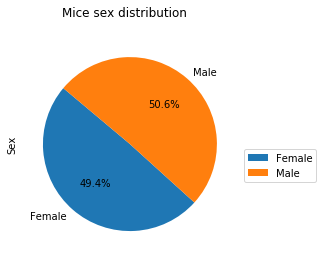

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data_gender_gb=mouse_data.groupby("Sex")
mouse_data_gender=mouse_data_gender_gb["Sex"].count()
mouse_data_gender


#del mouse_data_gender.index.name
mouse_data_gender_chart = mouse_data_gender.plot(kind='pie',subplots=True,legend='True',autopct="%1.1f%%",startangle=140)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),fontsize = 10)
plt.suptitle("Mice sex distribution")


plt.show()


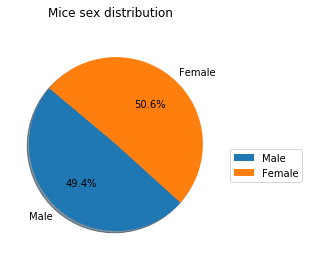

In [32]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mouse_data_gender, labels=labels,shadow=True, autopct="%1.1f%%",startangle=140)
#plt.xticks(x_axis,Drug_Regimen,rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),fontsize = 10)
plt.suptitle("Mice sex distribution")
plt.show()

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Final treatment
mouse_data_id_gp=mouse_data.groupby('Mouse ID')
max_mouse_timepoint=mouse_data_id_gp[['Timepoint']].max()
max_mouse_timepoint.reset_index(level=0, inplace=True)

mouse_data_final_timepoint_df=pd.merge(mouse_data,max_mouse_timepoint ,on=["Mouse ID","Timepoint"])
#Top 4 treatment regime
Top_4_regime=mouse_data_summary.sort_values("median")
Top_4_regime=Top_4_regime.nsmallest(4,"median")
Top_4_regime.reset_index(level=0, inplace=True)
Top_4_regime=Top_4_regime[["Drug Regimen"]]

mouse_final_timepoint_df=pd.merge(mouse_data_final_timepoint_df,Top_4_regime ,on="Drug Regimen")
mouse_final_timepoint_df

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouse_final_timepoint_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")







The lower quartile of tumor volume is: 37.2898392225
The upper quartile of tumor volume is: 58.463205455
The interquartile range of tumor volume is: 21.1733662325
The the median of tumor volume is: 45.0 
Values below 5.529789873749998 could be outliers.
Values above 90.22325480375 could be outliers.


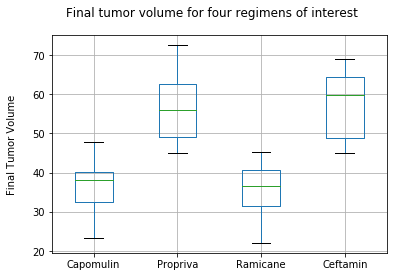

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_final_timepoint_df
regime = mouse_final_timepoint_df['Drug Regimen']
mouse_final_box_df=mouse_final_timepoint_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

Capomulin_final_box_df=mouse_final_timepoint_df.loc[mouse_final_timepoint_df['Drug Regimen']=='Capomulin']
Capomulin_df=Capomulin_final_box_df['Tumor Volume (mm3)']
Capomulin_df=Capomulin_df.rename(columns={'Tumor Volume (mm3)':'Capomulin'})

Propriva_final_box_df=mouse_final_timepoint_df.loc[mouse_final_timepoint_df['Drug Regimen']=='Propriva']
Propriva_df=Propriva_final_box_df['Tumor Volume (mm3)']
Propriva_df=Propriva_df.rename(columns={'Tumor Volume (mm3)':'Propriva'})

Ramicane_final_box_df=mouse_final_timepoint_df.loc[mouse_final_timepoint_df['Drug Regimen']=='Ramicane']
Ramicane_df=Ramicane_final_box_df['Tumor Volume (mm3)']
Ramicane_df=Ramicane_df.rename(columns={'Tumor Volume (mm3)':'Ramicane'})

Ceftamin_final_box_df=mouse_final_timepoint_df.loc[mouse_final_timepoint_df['Drug Regimen']=='Ceftamin']
Ceftamin_df=Ceftamin_final_box_df['Tumor Volume (mm3)']
Ceftamin_df=Ceftamin_df.rename(columns={'Tumor Volume (mm3)':'Ceftamin'})

  
mouse_final_regime_box_df = pd.DataFrame({'Capomulin':Capomulin_df
                  ,'Propriva':Propriva_df
                    ,'Ramicane': Ramicane_df
                     ,'Ceftamin':Ceftamin_df
                        
                    })


mouse_final_regime_box_df
mouse_final_regime_box_df.boxplot()
mouse_final_regime_box_df=mouse_final_regime_box_df.fillna(0)
mouse_final_regime_box_df
plt.ylabel('Final Tumor Volume', labelpad=15)
plt.suptitle("Final tumor volume for four regimens of interest ")





plt.show()

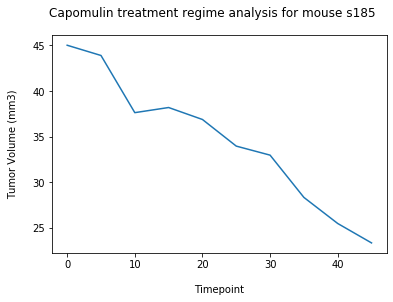

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_mouse_data=mouse_data.loc[mouse_data['Drug Regimen']=='Capomulin']
Capomulin_mouse_data_s185=Capomulin_mouse_data.loc[mouse_data['Mouse ID']=='s185']
Capomulin_mouse_data_s185=Capomulin_mouse_data_s185.reset_index()
x_axis1=Capomulin_mouse_data_s185['Timepoint']
y_axis1=Capomulin_mouse_data_s185['Tumor Volume (mm3)']
plt.plot(x_axis1,y_axis1)
plt.xlabel('Timepoint', labelpad=15)
plt.ylabel('Tumor Volume (mm3)', labelpad=15)
plt.suptitle("Capomulin treatment regime analysis for mouse s185 ")

plt.show()



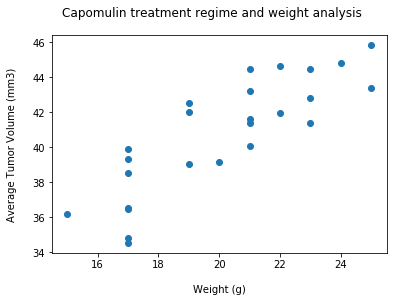

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_mouse_data_gp=Capomulin_mouse_data.groupby('Mouse ID')
y_axis= Capomulin_mouse_data_gp[['Tumor Volume (mm3)']].mean()
x_axis = Capomulin_mouse_data_gp[['Weight (g)']].mean()

plt.scatter(x=x_axis ,y=y_axis)
plt.xlabel('Weight (g)', labelpad=15)
plt.ylabel('Average Tumor Volume (mm3)', labelpad=15)
plt.suptitle("Capomulin treatment regime and weight analysis ")
plt.show()

The correlation between both factors is 0.84


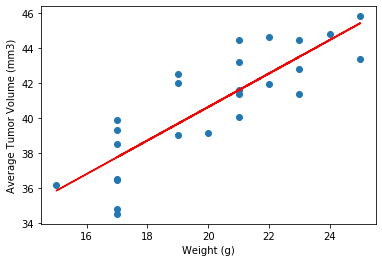

In [37]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
weight = x_axis['Weight (g)'].tolist()
Avg_tumor_volume = y_axis['Tumor Volume (mm3)'].tolist()
correlation = st.pearsonr(weight,Avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight , Avg_tumor_volume)
regress_values = np.asarray(weight)  * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(round(intercept,2))
plt.scatter(weight ,Avg_tumor_volume)
plt.plot(weight ,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

